In [1]:
import re
import tweepy
import numpy as np
import pandas as pd
from functions import * 
from textblob import TextBlob 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from configparser import ConfigParser
from better_profanity import profanity
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
api = get_api()

In [3]:
db = get_tweets(api, 'Joe Biden', 100, 'en')
db.head(2)

,searched_word,id_tweet,date_tweet,hour_tweet,username,description,location,following,followers,totaltweets,retweetcount,favoritecount,text,hashtags
0,Joe Biden,1576279500605620224,2022-10-01,18:34:53,RonnyJacksonTX,Congressman for #TX13 | Former White House Phy...,"Amarillo, Texas",325,368432,3736,2750,15254,Kamala has no idea how our border works becaus...,[]
1,Joe Biden,1576000947087892480,2022-10-01,00:08:01,0liviajulianna,(she/her) Director of Politics & Gov. @genzfo...,"Houston, TX",5148,364644,8735,2477,23298,Does Greg Abbott realize he’s debating Beto O’...,[]


In [4]:
all_tweets_clean = [clean_tweet(elem) for elem in db.text.tolist()]
sentiment_obj = [TextBlob(tweet) for tweet in all_tweets_clean]

In [5]:
df_sentiment = pd.DataFrame(columns=['tweet', 'polarity'])
for i, tweet in enumerate(all_tweets_clean):
    df_sentiment.loc[len(df_sentiment)] = [tweet, sentiment_obj[i].polarity]
    
df_sentiment['sentiment'] = np.where(df_sentiment['polarity'] < 0, 'Negative', np.where(df_sentiment['polarity'] == 0, 'Neutral', 'Positive'))
df_sentiment.head(2)

,tweet,polarity,sentiment
0,kamala has no idea how our border works becaus...,0.0,Neutral
1,does greg abbott realize he s debating beto o ...,0.0,Neutral


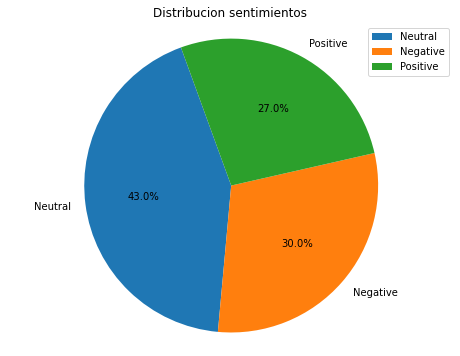

In [6]:
pie_plot(df_sentiment, 'sentiment', 'Distribucion sentimientos')

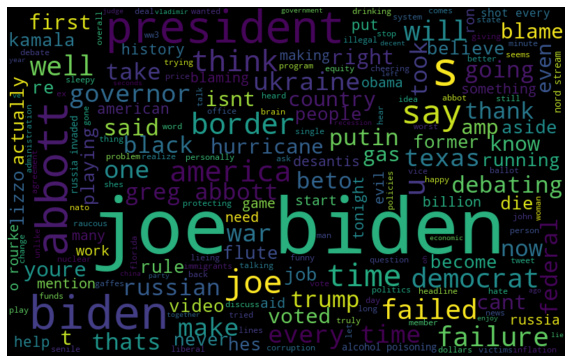

In [7]:
plot_wordCloud(df_sentiment, 'tweet')